<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# [실습] 데이터프레임 집계

1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.

In [4]:
import pandas as pd
import numpy as np

2) 다음 경로의 파일을 읽어 graduate 데이터프레임을 만드세요.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'

In [5]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Graduate_apply.csv'
graduate = pd.read_csv(path)

# 확인
graduate.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


3) 열의 데이터 형식과 값의 개수 등을 확인하세요.

In [6]:
graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


4) 기초통계정보를 확인하세요.

In [7]:
graduate.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


5) gre 중앙값을 확인하세요.

In [8]:
graduate['gre'].median()

580.0

6) rank별 gre 중앙값을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [12]:
tmp = graduate.groupby(by='rank', as_index=False)['gre'].median()
tmp

,rank,gre
0,1,600.0
1,2,600.0
2,3,580.0
3,4,560.0


7) rank별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [13]:
tmp = graduate.groupby(by='rank', as_index=False)['gpa'].mean()
tmp

,rank,gpa
0,1,3.453115
1,2,3.361656
2,3,3.432893
3,4,3.318358


8) rank, admit별 gpa 평균을 집계하여 tmp 데이터프레임으로 선언하고 확인하세요.

In [34]:
tmp = graduate.groupby(by=['rank','admit'], as_index=False)[['gpa']].mean()
tmp

,rank,admit,gpa
0,1,0,3.345714
1,1,1,3.544242
2,2,0,3.316598
3,2,1,3.442593
4,3,0,3.402258
5,3,1,3.534643
6,4,0,3.291455
7,4,1,3.441667


9) rank별 합격자 수를 집계하여 tmp 데이터프레임으로 선언하고 막대 그래프로 시각화하여 확인하세요.

In [18]:
graduate.groupby(by='rank', as_index=False)['admit'].sum()

,rank,admit
0,1,33
1,2,54
2,3,28
3,4,12


In [33]:
graduate.groupby(by='rank', as_index=False)[['admit']].sum()['rank']

0    1
1    2
2    3
3    4
Name: rank, dtype: int64

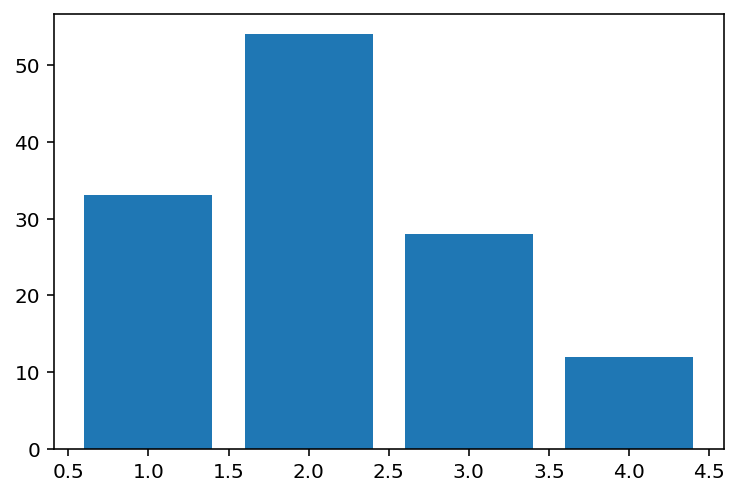

In [39]:
tmp = graduate.groupby(by='rank', as_index=False)['admit'].sum()
plt.bar(tmp['rank'], tmp['admit'])
plt.show()

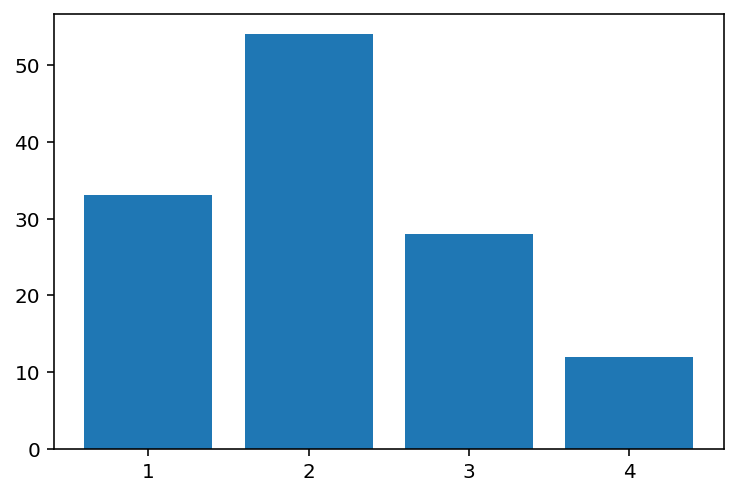

In [37]:
tmp = graduate.groupby(by='rank', as_index=False)['admit'].sum()
# plt.bar(x=tmp['rank'], height=tmp['admit'])

plt.bar(tmp['rank'].astype(str) , tmp['admit']) # x축 문자열 넣으면 값없는곳 굳이 안나옴
plt.show()

10) rank별 합격율을 집계하여 tmp 데이터프레임으로 선언하고 막대그래프로 시각화해 확인하세요.

- admit 열 값이 0, 1이므로 admit 열 평균이 합격율이 됨

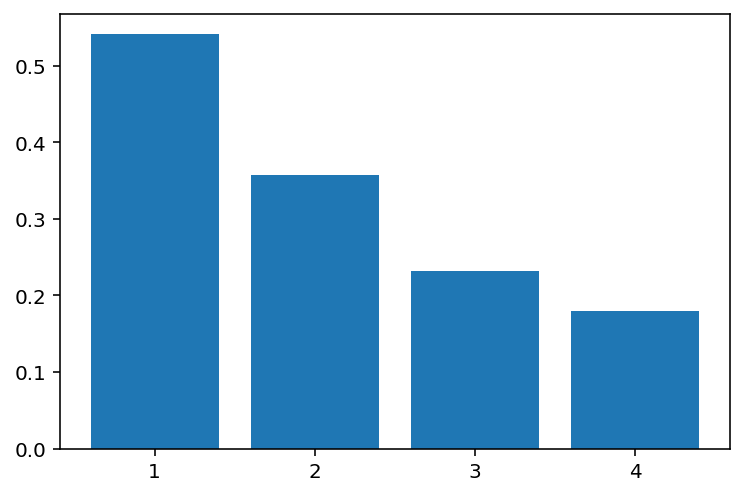

In [40]:
tmp = graduate.groupby(by='rank',  as_index=False)[['admit']].mean()
plt.bar( x=tmp['rank'].astype(str), height=tmp['admit'])
plt.show()